In [65]:
from classes.classes import *
from visualizer.main import Visualizer
from random import uniform

def gen_points(n : int) -> List[Point]:
    list = []
    for i in range(n):
        list.append(Point(uniform(0,100),uniform(0,100)))
    return list

def make_subscritable_points(list):
    list2 = []
    for point in list:
        list2.append((point.x,point.y))
    return list2

def visualise_tri(tri : Delaunay_Triangulation):
    vis = Visualizer()
    edges = []
    for edge in list(tri.neighbours.edges.keys()):
        edges.append((edge.p1.get(),edge.p2.get()))
    vis.add_line_segment(edges)
    return vis

In [66]:
points = gen_points(10)

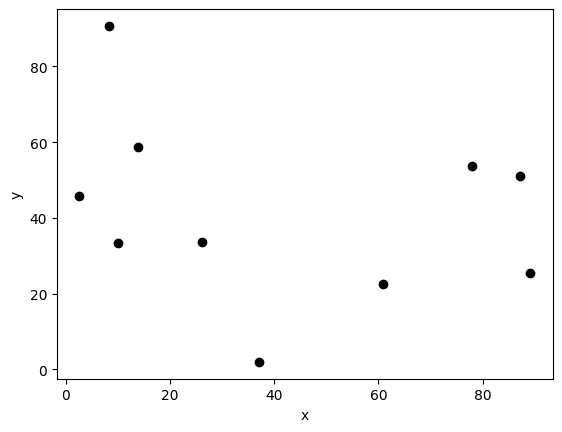

In [129]:
vis = Visualizer()
vis.add_point(make_subscritable_points(points),color="black")
vis.show()

Initialize

In [67]:
def initialize(points):
    tri = Delaunay_Triangulation(points)
    return tri, points

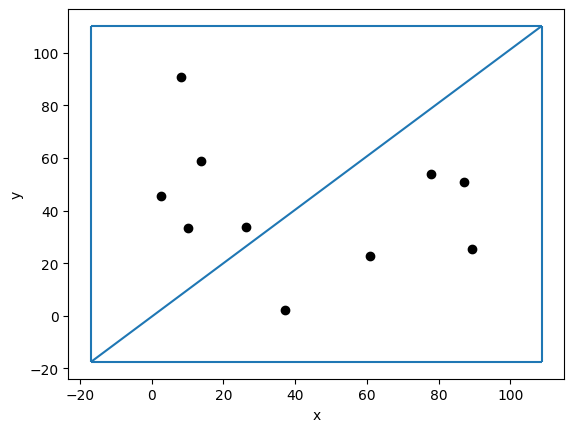

In [71]:
tri, points = initialize(points)
vis = visualise_tri(tri)
vis.add_point(make_subscritable_points(points),color="black")
vis.show()

In [72]:
def partial(points, n):
    tri = Delaunay_Triangulation(points)
    for i in range(n):
        curr = tri.find_triangle(points[i])
        neighbourhood, hull, _ = tri.find_neighbourhood(points[i],curr,set(),neighbourhood=[], hull=[])
        tri.delete_neighbourhood(neighbourhood)
        tri.rebuild_neighbourhood(points[i], hull)
        
    return tri, points

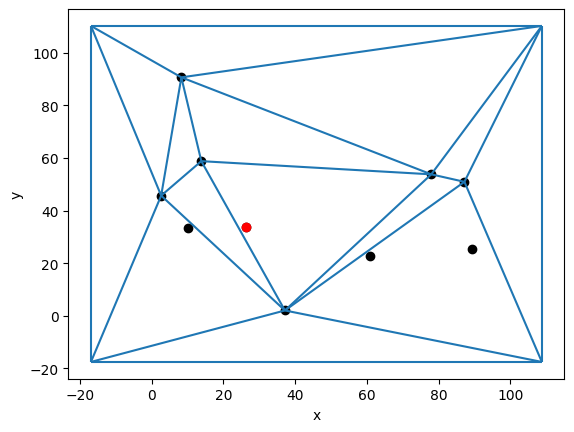

In [130]:
tri, points = partial(points, 6)
vis = visualise_tri(tri)
vis.add_point(make_subscritable_points(points),color="black")
vis.add_point(points[6].get(),color="red")
# for edge in find_next_triangle(tri.neighbours,find_next_triangle(tri.neighbours,tri.inittriangle,points[6]),points[6]).edges:
#     vis.add_line_segment((edge.p1.get(),edge.p2.get()),color="red")
vis.show()

Neighbourhood

In [123]:
def fneighbourhood(points, n):
    tri = Delaunay_Triangulation(points)
    for i in range(n):
        curr = tri.find_triangle(points[i])
        neighbourhood, hull, _ = tri.find_neighbourhood(points[i],curr,set(),neighbourhood=[], hull=[])
        tri.delete_neighbourhood(neighbourhood)
        tri.rebuild_neighbourhood(points[i], hull)
        
    return tri, points

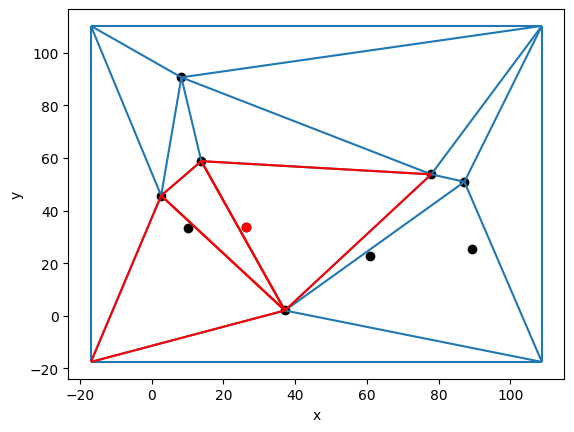

In [109]:
tri, points = fneighbourhood(points, 6)
vis = visualise_tri(tri)
vis.add_point(make_subscritable_points(points),color="black")
curr = tri.find_triangle(points[6])
neighbourhood, hull, _ = tri.find_neighbourhood(points[6],curr,set(),neighbourhood=[],hull=[])
for triangle in neighbourhood:
    for edge in triangle.edges:
        vis.add_line_segment((edge.p1.get(),edge.p2.get()), color="red")
vis.add_point(points[6].get(),color="red")

vis.show()

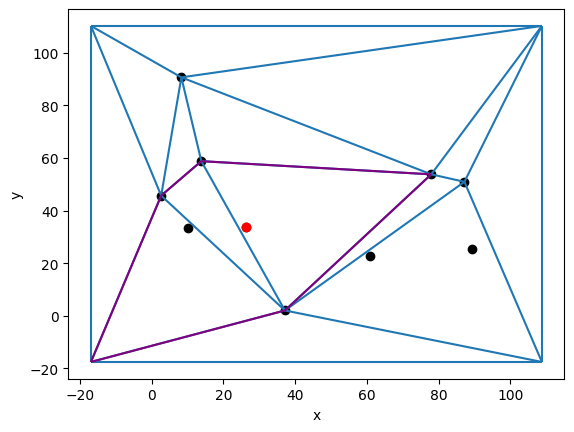

In [121]:
tri, points = fneighbourhood(points, 6)
vis = visualise_tri(tri)
vis.add_point(make_subscritable_points(points),color="black")
curr = tri.find_triangle(points[6])
neighbourhood, hull, _ = tri.find_neighbourhood(points[6],curr,set(),neighbourhood=[],hull=[])

for edge in hull:
    vis.add_line_segment((edge.p1.get(),edge.p2.get()), color="purple")
vis.add_point(points[6].get(),color="red")

vis.show()

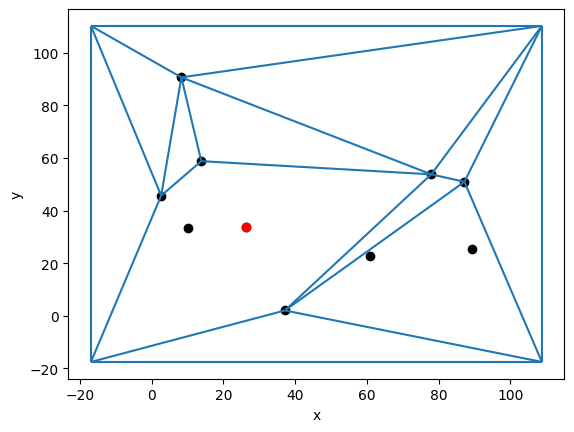

In [125]:
tri, points = fneighbourhood(points, 6)
curr = tri.find_triangle(points[6])
neighbourhood, hull, _ = tri.find_neighbourhood(points[6],curr,set(),neighbourhood=[],hull=[])
tri.delete_neighbourhood(neighbourhood)
vis = visualise_tri(tri)
vis.add_point(make_subscritable_points(points),color="black")
vis.add_point(points[6].get(),color="red")

vis.show()

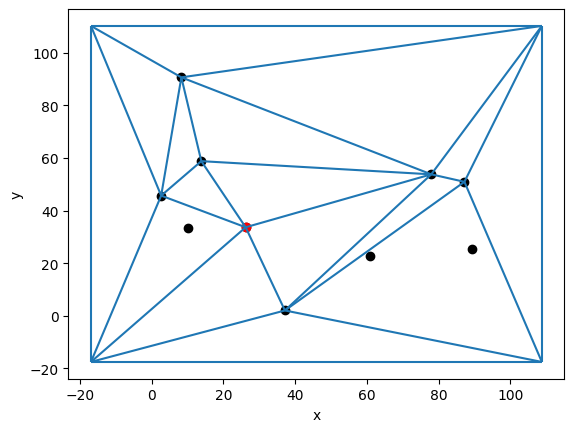

In [127]:
tri, points = fneighbourhood(points, 6)
curr = tri.find_triangle(points[6])
neighbourhood, hull, _ = tri.find_neighbourhood(points[6],curr,set(),neighbourhood=[],hull=[])
tri.delete_neighbourhood(neighbourhood)
tri.rebuild_neighbourhood(points[6],hull)
vis = visualise_tri(tri)
vis.add_point(make_subscritable_points(points),color="black")
vis.add_point(points[6].get(),color="red")

vis.show()

In [69]:
def main_test(points):
    tri = Delaunay_Triangulation(points)
    for i in range(len(points)):
        curr = tri.find_triangle(points[i])
        neighbourhood, hull, _ = tri.find_neighbourhood(points[i],curr,set(),neighbourhood=[], hull=[])
        tri.delete_neighbourhood(neighbourhood)
        tri.rebuild_neighbourhood(points[i], hull)
    # tri.clean_up()
        
    return tri, points

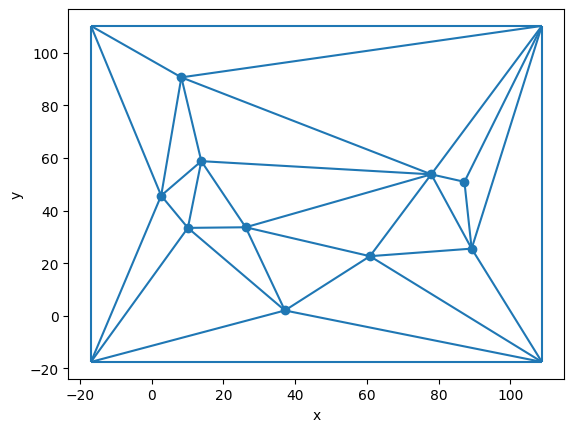

In [70]:
tri, points = main_test(points)
vis = visualise_tri(tri)
vis.add_point(make_subscritable_points(points))
vis.show()